In [1]:
'''Ejercicio hundir la flota, pendiente de adornar'''

'Ejercicio hundir la flota, pendiente de adornar'

'''pasos a realizar:
-crear presentación con input, donde se pide nommbre del jugador
-crear dos tablero 10 x 10 uno de ellos con los barcos 
-se podría hacer que el jugador posicione los barcos de forma manual con inputs, ya  que el formato aleatorio lo va a hacer igualmente el jugador "máquina"
-programar que e repita el turno en caso de impacto
-si la máquina realiza impacto, debería de probar sus siguientes lancamientos en un rango de n+-1 en altitud y latitud hasta volver a impactar y repetir bucle
- en caso de hundimiento, todas las casillas a +-1 del area del barco quedarán anuladas de la IA puesto que no habrá barcos en dicha posicion
- *** podriamos programar imputs ingeniosos en algunos casos segun se desarrolle la partida, como que eliminar la mitad de la flota enemiga la máquina nos haga algun tipo de comentario o amenza, y finalizar el juego con un "has ganado" o " la próxima me vengaré"
- puede ser interesar programar la IA con dos dificultades, disparos aleatorios, o disparos precisos, aplicando conocimiento en los lanzamientos con el n+-1
- mme gustaría insertar un avatar de imagen del adversario con está foto.'''
  

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random

<class 'numpy.ndarray'>
(237, 278, 3)


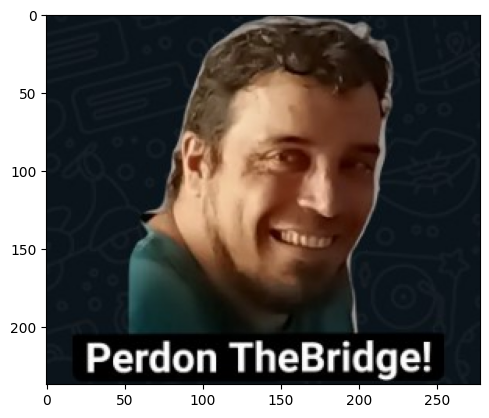

In [7]:


imagen = np.array(Image.open("./perdon.jpg"))
print(type(imagen))
print(imagen.shape)

plt.imshow(imagen)

IMAGEN DEL RIVAL ENEMIGO, aparecerá en la presentacion de los jugadores y si insertamos comentarios podríamos hacer un print() comenratario junto con su foto.

In [12]:
np.random.seed(2022)
tablero_partida = np.full((10,10), fill_value = ' ')
print(tablero_partida)
tablero_barcos= np.full((10,10), fill_value = ' ')
print(tablero_barcos)
orient = random.choice(['N', 'S', 'E', 'O'])
barco = 0

[[' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']]
[[' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']]


POSICIONAMIENTO DE LOS BARCOS

In [26]:
'''se me habia ocurrido hacer los barcos con bucle while, si cada posicion de barco es "o" tendremos 4x1  de una celda, 3*2 de otra, 2*3 de otra
y 4*1 del grande. 
En total debería de haber 20 celdas en el tablero con "o", podemos programar la posicion de los barcos ocn un while en el que las posiciones 
se ejecuten segun el barco que queremos poner '''
while barco <=20
    random_fila = random.randint(0,9)
    random_columna = random.randint(0,9)
    if tablero_barcos[random_fila,random_columna] == ' ' and tablero_barcos['o']<4 and random_fila+1 == ' ' and random_fila-1 == ' ' and :
        tablero_barcos[random_fila,random_columna] = 'o' #faltaria programar que no se toquen los barcos
    elif:
        tablero_barcos[random_fila,random_columna] == ' ' and tablero_barcos['o']<10:
        tablero_barcos[random_fila,random_columna] = 'o'
    
    
    
    print(tablero_barcos)
break

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [32]:
while barco <20:
    random_fila = random.randint(0,9)
    random_columna = random.randint(0,9)
    if tablero_barcos[random_fila,random_columna] == ' ' and barco <4 and random_fila+1 == ' ' and random_fila-1 == ' ' :
        tablero_barcos[random_fila,random_columna] = "o" #faltaria programar que no se toquen los barcos
    break
print(tablero_barcos)

[[' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']]


In [23]:
for barco in range(0,10):
    if barco >5 and barco<8:
        print(barco)

6
7


In [58]:
e = 0
random_fila = random.randint(0,9)
random_columna = random.randint(0,9)
while e <=4:
    if tablero_barcos[1,4] == ' ' and  random_fila+1 == ' ':
        tablero_barcos[1,random_columna] = "o" #faltaria programar que no se toquen los barcos
    print(tablero_barcos)
    e+1
    else:
        break
    

IndentationError: unexpected indent (465200299.py, line 9)